In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('full_resample.csv').drop(columns = 'Unnamed: 0')

In [3]:
df.head()

,Season,Name,Team,G,AB,PA,H,R,RBI,HR,...,WAR,OBP+,TTO%,playerid,MVP,OPS+,traditional predictions,sabr_predictions,trad_proj,sabr_proj
0,1999,Alex Rodriguez,Mariners,129,502,572,143,110,111,42,...,4.7,103,0.362,1274,0,120,0,0,0,0
1,1999,Garret Anderson,Angels,157,620,660,188,88,80,21,...,2.4,97,0.206,2,0,90,0,0,0,0
2,1999,Robin Ventura,Mets,161,588,671,177,88,120,32,...,7.3,108,0.320,854,0,115,0,0,0,1
3,2008,Edwin Encarnacion,Reds,146,506,582,127,75,68,26,...,1.6,100,0.325,2151,0,98,0,0,0,0
4,2000,Marvin Benard,Giants,149,560,633,147,102,55,12,...,2.3,98,0.272,1382,0,78,0,0,0,0


In [4]:
no_fun = ['H', 'RBI', 'HR', 'SO', 'AVG', 'OBP', 'OPS']
sabr = ['R', 'BB', 'IBB', 'OPS+', 'wRC+', 'WAR', 'TTO%']

In [5]:
X_t = df[no_fun]
X_s = df[sabr]
y = df['MVP']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, stratify = y)

ss = StandardScaler()

In [7]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/Users/brianschor/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/brianschor/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/brianschor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [8]:
model = Sequential()

model.add(Dense(14, activation='relu',
               input_shape = (X_train.shape[1],)))
model.add(Dense(14, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [10]:
history = model.fit(X_train_sc, y_train, epochs = 10, batch_size = 300, validation_data=(X_test_sc, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 2250 samples, validate on 750 samples
Epoch 1/10
2250/2250 [==============================] - 0s 199us/step - loss: 0.6431 - acc: 0.7378 - val_loss: 0.6107 - val_acc: 0.7867
Epoch 2/10
2250/2250 [==============================] - 0s 11us/step - loss: 0.5904 - acc: 0.8080 - val_loss: 0.5604 - val_acc: 0.8573
Epoch 3/10
2250/2250 [==============================] - 0s 12us/step - loss: 0.5444 - acc: 0.8711 - val_loss: 0.5170 - val_acc: 0.8800
Epoch 4/10
2250/2250 [==============================] - 0s 14us/step - loss: 0.5036 - acc: 0.8924 - val_loss: 0.4792 - val_acc: 0.8960
Epoch 5/10
2250/2250 [==============================] - 0s 14us/step - loss: 0.4686 - acc: 0.8987 - val_loss: 0.4454 - val_acc: 0.9067
Epoch 6/10
2250/2250 [==============================] - 0s 9us/step - loss: 0.4365 - acc: 0.9013 - val_loss: 0.4148 - val_acc: 0.9107
Epoch 7/10
2250/2250 [==============================] - 0s 11us/step - loss: 0.4075 - acc: 0.90

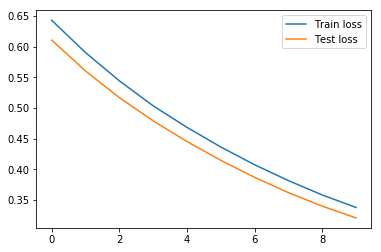

In [11]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

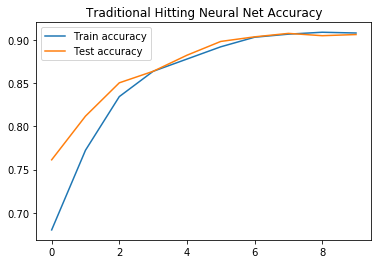

In [19]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend()
plt.title('Traditional Hitting Neural Net Accuracy')
plt.savefig('Hitting NNT');

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, stratify = y)

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)



/Users/brianschor/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/brianschor/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/brianschor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [14]:
model = Sequential()

model.add(Dense(14, activation='relu',
               input_shape = (X_train.shape[1],)))
model.add(Dense(14, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [15]:
history = model.fit(X_train_sc, y_train, epochs = 10, batch_size = 300, validation_data=(X_test_sc, y_test))

Train on 2250 samples, validate on 750 samples
Epoch 1/10
2250/2250 [==============================] - 0s 196us/step - loss: 0.6600 - acc: 0.6800 - val_loss: 0.6417 - val_acc: 0.7613
Epoch 2/10
2250/2250 [==============================] - 0s 14us/step - loss: 0.6245 - acc: 0.7724 - val_loss: 0.6103 - val_acc: 0.8120
Epoch 3/10
2250/2250 [==============================] - 0s 12us/step - loss: 0.5923 - acc: 0.8347 - val_loss: 0.5809 - val_acc: 0.8507
Epoch 4/10
2250/2250 [==============================] - 0s 15us/step - loss: 0.5621 - acc: 0.8640 - val_loss: 0.5532 - val_acc: 0.8640
Epoch 5/10
2250/2250 [==============================] - 0s 10us/step - loss: 0.5332 - acc: 0.8782 - val_loss: 0.5266 - val_acc: 0.8827
Epoch 6/10
2250/2250 [==============================] - 0s 11us/step - loss: 0.5055 - acc: 0.8924 - val_loss: 0.5006 - val_acc: 0.8987
Epoch 7/10
2250/2250 [==============================] - 0s 11us/step - loss: 0.4784 - acc: 0.9036 - val_loss: 0.4752 - val_acc: 0.9040
Epoch 8

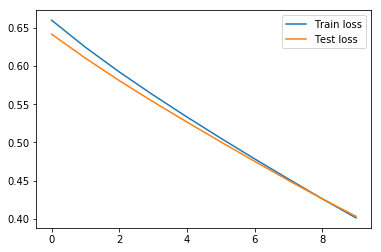

In [16]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

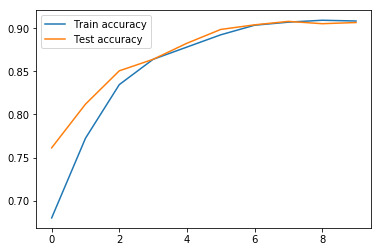

In [17]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend();